In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(1212)

In [82]:
e_k3 = pd.read_csv("data/Pse_in_One2/my_DB/ensembl_transcript__Kmer_k3_RNA.csv", header=None).to_numpy()
e_dacc = pd.read_csv("data/Pse_in_One2/my_DB/ensembl_transcript__DACC_lag2_RNA.csv", header=None).to_numpy()
e_sc = pd.read_csv("data/Pse_in_One2/my_DB/ensembl_transcript__SC-PseDNC-General_all_index_RNA.csv", header=None).to_numpy()
r_k3 = pd.read_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript__Kmer_k3_RNA.csv", header=None).to_numpy()
r_dacc = pd.read_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript__DACC_lag2_RNA.csv", header=None).to_numpy()
r_sc = pd.read_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript__SC-PseDNC-General_all_index_RNA.csv", header=None).to_numpy()

In [83]:
e_data = np.append(e_k3, e_dacc, axis=1)
e_data = np.append(e_data, e_sc, axis=1)
r_data = np.append(r_k3, r_dacc, axis=1)
r_data = np.append(r_data, r_sc, axis=1)

In [71]:
e_rbp = pd.read_csv("data/Pse_in_One2/my_DB/ensembl_transcript__RBP_matrix.csv")
r_rbp = pd.read_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript__RBP_matrix.csv")

In [75]:
e_seq = pd.read_csv("data/Pse_in_One2/my_DB/ensembl_transcript.csv")
r_seq = pd.read_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript.csv")

In [90]:
e_rbp[e_rbp.columns.drop(["Transcript_stable_ID", "Seq"])].drop([6140]).reset_index(drop=True)

,AARS,AATF,ABCF1,AGGF1,AKAP1,AKAP8L,APOBEC3C,AQR,AUH,BCCIP,...,XPO5,XRCC6,XRN2,YBX3,YWHAG,ZC3H11A,ZC3H8,ZNF622,ZNF800,ZRANB2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
print(e_data.shape)
print(e_rbp.shape)
print(e_seq.shape)
print(r_data.shape)
print(r_rbp.shape)
print(r_seq.shape)

(49467, 196)
(49468, 156)
(49468, 9)
(53902, 196)
(53902, 156)
(53902, 5)


In [73]:
e_rbp

,Transcript_stable_ID,Seq,AARS,AATF,ABCF1,AGGF1,AKAP1,AKAP8L,APOBEC3C,AQR,...,XPO5,XRCC6,XRN2,YBX3,YWHAG,ZC3H11A,ZC3H8,ZNF622,ZNF800,ZRANB2
0,ENST00000652523,GCAGCGCGGCCGGTGGGGACTGCGGGGCGGGCCGGAGTCCGTCCGA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENST00000651660,ATGCGAGGCTGGGGCCGGTTGCCTACCGGCCGCTTCTCGCCGAGGC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENST00000426635,AGGGGCGCCCCCTCCCTCCGGTGGCCGGCGAAGGAAGTCGGTCCGC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENST00000441570,GCGGCCGCAGATCCCGGCAACTTGCGAACCGGGAAAAGTTTGCGGC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENST00000602878,CGGCCGCAGATCCCGGCAACTTGCGAACCGGGAAAAGTTTGCGGCG...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49463,ENST00000652655,ATTCTTTTCTGTTTTTCTCCTGATTGTTGCTTACTCTTTCAAAAAT...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49464,ENST00000650942,GTAGTAGTTGTTGAGCAGAGGGAAAGGGATAGGAGAAGGATGTGGA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49465,ENST00000625013,GTCAGCCGGGGCCGCAGCGCGGCCGGTGGGGACTGCGGGGCGGGCC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49466,ENST00000652370,GACTCGTCGTCAGCCGGGGCCGCAGCGCGGCCGGTGGGGACTGCGG...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
e_rbp_b = pd.read_csv("data/RBP_eclip/ensembl_RBPBindingSite.csv")
r_rbp_b = pd.read_csv("data/RBP_eclip/RNAAtlas_RBPBindingSite.csv")
e_df = e_rbp_b[["RBP", "Transcript_stable_ID"]]
r_df = r_rbp_b[["RBP", "Transcript_stable_ID"]]

e_matrix_df = pd.get_dummies(e_df.RBP).groupby(e_df.Transcript_stable_ID).apply(max)
e_matrix_df = e_matrix_df.reset_index()
r_matrix_df = pd.get_dummies(r_df.RBP).groupby(r_df.Transcript_stable_ID).apply(max)
r_matrix_df = r_matrix_df.reset_index()

e_seq = pd.read_csv("data/Pse_in_One2/my_DB/ensembl_transcript.csv")
r_seq = pd.read_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript.csv")
e_seq = e_seq[["Transcript_stable_ID", "Seq"]]
r_seq = r_seq[["Transcript_stable_ID", "Seq"]]

e_seq_matrix_df = pd.merge(e_seq, e_matrix_df, on="Transcript_stable_ID", how="left")
e_seq_matrix_df.fillna(0, inplace=True)
r_seq_matrix_df = pd.merge(r_seq, r_matrix_df, on="Transcript_stable_ID", how="left")
r_seq_matrix_df.fillna(0, inplace=True)

e_seq_matrix_df.to_csv("data/Pse_in_One2/my_DB/ensembl_transcript__RBP_matrix.csv", index=False)
r_seq_matrix_df.to_csv("data/Pse_in_One2/my_DB/RNAAtlas_gene_transcript__RBP_matrix.csv", index=False)

In [ ]:
rbp_pwm = pd.read_csv("data/merge_data/ALL/transcript2rbp_pvalue.csv")

In [2]:
rbp_eclip = pd.read_csv("data/RBP_eclip/enst2rbp_eclip_matrix.csv")
rbp_pwm = pd.read_csv("data/merge_data/ALL/transcript2rbp_pvalue.csv")

In [5]:
r_eclip_df = pd.read_csv("data/RBP_eclip/RNAAtlas_RBPBindingSite.csv")

In [7]:
len(np.unique(r_eclip_df["Transcript_stable_ID"]))

15419

## Pse in One2.0 and RBP eclip

In [ ]:
rbp_eclip_df = pd.read_csv("data/RBP_eclip/enst2rbp_eclip_matrix.csv")
seq_df = pd.read_csv("data/merge_data/ALL/Kmer_k3__DACC_lag2__SC-PseDNC-General_all_index.csv")
merge_df = pd.merge(seq_df, rbp_eclip_df, on=["Transcript_stable_ID", "loc"], how="inner")
# merge_df.to_csv("data/RBP_eclip/enst2pse_in_one2rbp_eclip_matrix.csv", index=False)
loc = merge_df['loc']
loc_np = np.where(loc.to_numpy() == 'N', 1, 0)
rbp_matrix = merge_df[merge_df.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy(dtype=float)
num = len(loc_np)
idx = np.arange(num)
np.random.shuffle(idx)
train_idx = idx[:int(num * 0.8)]
test_idx = idx[int(num * 0.8):]
# np.save("data/RBP_eclip/test/pseinone_rbpeclip__id", train_idx)
# np.save("data/RBP_eclip/train/pseinone_rbpeclip__id", train_idx)
# np.save("data/RBP_eclip/test/pseinone_rbpeclip__y", loc_np[test_idx])
# np.save("data/RBP_eclip/train/pseinone_rbpeclip__y", loc_np[train_idx])
# np.save("data/RBP_eclip/test/pseinone_rbpeclip__x", rbp_matrix[test_idx])
# np.save("data/RBP_eclip/train/pseinone_rbpeclip__x", rbp_matrix[train_idx])

## RBP eclip data

In [1]:
e_rbp_b = pd.read_csv("data/RBP_eclip/ensembl_RBPBindingSite.csv")
r_rbp_b = pd.read_csv("data/RBP_eclip/RNAAtlas_RBPBindingSite.csv")
b_loc = pd.read_csv("data/Chiu/jand_benchmark_loc.csv")
e_df = e_rbp_b[["RBP", "Transcript_stable_ID"]]
r_df = r_rbp_b[["RBP", "Transcript_stable_ID"]]
l_df = b_loc[["1", "9"]]
l_df = l_df.rename(columns={
    "1": "Transcript_stable_ID",
    "9": "loc"
})
rbp2id = e_df.append(r_df)
merge_df = pd.merge(rbp2id, l_df, on="Transcript_stable_ID", how="inner")
matrix_df = pd.get_dummies(merge_df.RBP).groupby(merge_df.Transcript_stable_ID).apply(max)
t2rbp_matrix = pd.merge(matrix_df, l_df, on="Transcript_stable_ID", how="inner")
# t2rbp_matrix.to_csv("data/RBP_eclip/enst2rbp_eclip_matrix.csv", index=False)
loc = t2rbp_matrix['loc']
loc_np = np.where(loc.to_numpy() == 'N', 1, 0)
rbp_matrix = t2rbp_matrix[t2rbp_matrix.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy(dtype=int)
# np.save("data/RBP_eclip/All/loc", loc_np)
# np.save("data/RBP_eclip/All/rbp_binary", rbp_matrix)
num = len(loc_np)
idx = np.arange(num)
np.random.shuffle(idx)
train_idx = idx[:int(num * 0.8)]
test_idx = idx[int(num * 0.8):]
# np.save("data/RBP_eclip/test/y", loc_np[test_idx])
# np.save("data/RBP_eclip/train/y", loc_np[train_idx])
# np.save("data/RBP_eclip/test/x", rbp_matrix[test_idx])
# np.save("data/RBP_eclip/train/x", rbp_matrix[train_idx])

NameError: name 'pd' is not defined

---

In [8]:
data_col = np.load("data/merge_data/ALL/transcript2pse_in_one*rbp__col.npy")
pval = np.load("data/merge_data/seq_rbp/t2p*r_p_10-3_-log10__trian__x__utest_pval.npy")
motif_col = np.load("data/merge_data/ALL/transcript2rbp_pvalue__col.npy")

rbp_list = []
motif_list = []
seq_list = []
for i in data_col[np.arange(len(pval))[pval < 10**-5]]:
    temp = i.split("*")
    seq_list.append(temp[0])
    
    temp = temp[1].split("__")
    rbp_list.append(temp[0])
    motif_list.append(temp[1])

In [9]:
from io import StringIO

with open("data/RBP-PWM/PWM.txt", 'r') as f:
    seq_list = f.read().split("\n\n\n")

rbp_dict_list = []
for i in range(len(seq_list)):
    if "Pos" in seq_list[i]:
        temp_list = seq_list[i].split("Pos")
        rbp_dict = dict()
        for val in temp_list[0].split("\n")[:-1]:
            key, val = val.split("\t")
            rbp_dict[key] = val
        rbp_dict_list.append(rbp_dict)
print(pd.DataFrame(rbp_dict_list))
pd.DataFrame(rbp_dict_list).to_csv("data/RBP-PWM/RBP.csv", index=False)

            RBP RBP Name             Gene     Motif   Family       Species
0    T02652_0.6    MBNL1  ENSG00000152601  M037_0.6  CCCH ZF  Homo_sapiens
1    T02652_0.6    MBNL1  ENSG00000152601  M320_0.6  CCCH ZF  Homo_sapiens
2    T02643_0.6   ZC3H10  ENSG00000135482  M083_0.6  CCCH ZF  Homo_sapiens
3    T02638_0.6    ZFP36  ENSG00000128016  M269_0.6  CCCH ZF  Homo_sapiens
4    T02638_0.6    ZFP36  ENSG00000128016  M350_0.6  CCCH ZF  Homo_sapiens
..          ...      ...              ...       ...      ...           ...
135  T37168_0.6    U2AF2  ENSG00000063244  M077_0.6      RRM  Homo_sapiens
136  T37173_0.6   ZNF638  ENSG00000075292  M155_0.6      RRM  Homo_sapiens
137  T61784_0.6   SAMD4A  ENSG00000020577  M061_0.6      SAM  Homo_sapiens
138  T61860_0.6     ACO1  ENSG00000122729  M256_0.6  Unknown  Homo_sapiens
139  T62023_0.6   YTHDC1  ENSG00000083896  M354_0.6      YTH  Homo_sapiens

[140 rows x 6 columns]


In [10]:
data_df = pd.read_csv("data/merge_data/ALL/transcript2pse_in_one*rbp_pvalue__cutoff10-3.csv")

rbp_df = pd.read_csv("data/RBP-PWM/RBP.csv")

rbp_dict = rbp_df.set_index('Motif')['RBP Name'].to_dict()
col_list = []
for c in data_df.columns.drop(["loc", "Transcript_stable_ID"]):
    if "*" in c:
        s = c.split("*")[0]
        m = c.split("*")[1]
        col_list.append("%s*%s__%s" % (s, rbp_dict[m], m))
    else:
        col_list.append(c)
np.save("data/merge_data/ALL/transcript2pse_in_one*rbp__col.npy", np.array(col_list))

In [11]:
rbp_df = pd.read_csv("data/merge_data/ALL/transcript2rbp_pvalue.csv")
np.save("data/merge_data/ALL/transcript2rbp_pvalue__col.npy", np.array(rbp_df.columns.drop(["loc", "Transcript_stable_ID"]).tolist()))

In [12]:
s = ""
for u in [1, 5]:
    s += "nohuppython PSO_train_daal4py.py -p 1 -s 1 -u 4000 -e 512 -t 1000 -f 5\
        -i /data/jand/sixthTool/data/merge_data/seq_rbp/pse_in_one*rbp_pvalue_cutoff10-3_-log10__utest_pval00%s__train__x.npy \
        -l /data/jand/sixthTool/data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy\
        -o /data/jand/sixthTool/data/merge_data/seq_rbp_output/pse_in_one*rbp_pvalue_cutoff10-3_-log10__utest_pval00%s__train__x__PSO_train_daal4py_s1_f5_u10000_e512_t100__PSO_train_daal4py__v230417\
        &>data/log/PSO_train_daal4py__pse_in_one*rbp_pvalue_cutoff10-3_-log10__utest_pval00%s__train__x__PSO_train_daal4py_s1_f5_u10000_e512_t100__PSO_train_daal4py__v230417.txt& \n" % (u, u, u)
with open("esvm.sh", "w") as f: 
    f.write(s)

In [1]:
s = ""
for e in [512, 1024]:
    for t in [1000, 10000]:
        # for u in [4, 5]:
        s += "nohup python hpo_svm_train.py -m esvm -p 10 -e %s -f 10 -s 20 -t %s \
            -i data/RBP_eclip/train/pseinone_rbpeclip_x.npy \
            -l data/RBP_eclip/train/pseinone_rbpeclip_y.npy \
            -o data/RBP_eclip/output/hpo_svm_train__pseinone_rbpeclip_x__esvm_e%s_p10_f10_s20_t%s_hasNu\
            &>data/log/hpo_svm_train__pseinone_rbpeclip_x__esvm_e%s_p10_f10_s20_t%s_hasNu.txt& \n" % (e, t, e, t, e, t)
with open("esvm.sh", "w") as f: 
    f.write(s)

In [ ]:
s = ""
for e in [512, 1024]:
    for t in [1000, 10000]:
        # for u in [4, 5]:
        s += "nohup python hpo_svm_train.py -m esvm -p 10 -e %s -f 10 -s 10 -t %s -nor True \
            -i data/merge_data/seq_rbp/rbp_10-3_-log10__train__x.npy \
            -l data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy \
            -o data/merge_data/seq_rbp_output/hpo_svm_train__rbp_10-3_-log10__esvm_e%s_p10_f10_s10_t%s_nor_hasNu\
            &>data/log/hpo_svm_train__rbp_10-3_-log10__esvm_e%s_p10_f10_s10_t%s_nor_hasNu.txt& \n" % (e, t, e, t, e, t)

        s += "nohup python hpo_svm_train.py -m esvm -p 10 -e %s -f 10 -s 10 -t %s -nor True \
            -i data/merge_data/seq_rbp/rbp_10-3_-log10_utest1e-4__train__x.npy \
            -l data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy \
            -o data/merge_data/seq_rbp_output/hpo_svm_train__rbp_10-3_-log10_utest1e-4__esvm_e%s_p10_f10_s10_t%s_nor_hasNu\
            &>data/log/hpo_svm_train__rbp_10-3_-log10_utest1e-4__esvm_e%s_p10_f10_s10_t%s_nor_hasNu.txt& \n" % (e, t, e, t, e, t)

        s += "nohup python hpo_svm_train.py -m esvm -p 10 -e %s -f 10 -s 10 -t %s -nor True \
            -i data/merge_data/seq_rbp/rbp_10-3_-log10_utest1e-5__train__x.npy \
            -l data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy \
            -o data/merge_data/seq_rbp_output/hpo_svm_train__rbp_10-3_-log10_utest1e-5__esvm_e%s_p10_f10_s10_t%s_nor_hasNu\
            &>data/log/hpo_svm_train__rbp_10-3_-log10_utest1e-5__esvm_e%s_p10_f10_s10_t%s_nor_hasNu.txt& \n" % (e, t, e, t, e, t)

with open("esvm.sh", "w") as f: 
    f.write(s)

In [14]:
s = ""
for e in [512, 1024]:
    for t in [1000, 10000]:
        s += "nohup python save_model.py -m esvm\
            -x data/merge_data/seq_rbp/pse_in_one2__rbp_10-4_-log10__train__x.npy \
            -y data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy \
            -i data/merge_data/seq_rbp/pse_in_one2__rbp_10-4_-log10__train__x.npy \
            -l data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy \
            -p data/merge_data/seq_rbp_output/hpo_svm_train__pse_in_one2__rbp_10-4_-log10__esvm_e%s_p10_f10_s10_t%s_hasNu.json\
            -s data/model/merge_data/pse_in_one2__rbp_10-4_-log10__esvm_e%s_p10_f10_s10_t%s_hasNu.pickle\
            &>data/log/save_model__pse_in_one2__rbp_10-4_-log10__esvm_e%s_p10_f10_s10_t%s_hasNu.txt& \n" % (e, t, e, t, e, t)

with open("esvm.sh", "w") as f: 
    f.write(s)

In [15]:
seq_df = pd.read_csv("data/merge_data/ALL/Kmer_k3__DACC_lag2__SC-PseDNC-General_all_index.csv")
rbp_df = pd.read_csv("data/merge_data/ALL/transcript2rbp_pvalue__cutoff10-3.csv")

In [16]:
seq_col = list(seq_df.columns[2:])
rbp_col = list(rbp_df.columns[2:])
new_df = pd.DataFrame([])
for i in range(len(seq_col)):
    for j in range(len(rbp_col)):
        print("%s*%s" %(seq_col[i], rbp_col[j]))
        new_df["%s*%s" %(seq_col[i], rbp_col[j])] = seq_df[seq_col[i]] * rbp_df[rbp_col[j]]

0*M001_0.6
0*M002_0.6
0*M004_0.6
0*M013_0.6
0*M016_0.6
0*M019_0.6
0*M020_0.6
0*M021_0.6
0*M022_0.6
0*M023_0.6
0*M024_0.6
0*M026_0.6
0*M027_0.6
0*M032_0.6
0*M033_0.6
0*M035_0.6
0*M036_0.6
0*M037_0.6
0*M040_0.6
0*M042_0.6
0*M043_0.6
0*M044_0.6
0*M046_0.6
0*M047_0.6
0*M048_0.6
0*M050_0.6
0*M051_0.6
0*M052_0.6
0*M053_0.6
0*M054_0.6
0*M055_0.6
0*M061_0.6
0*M062_0.6
0*M065_0.6
0*M068_0.6
0*M069_0.6
0*M070_0.6
0*M071_0.6
0*M072_0.6
0*M073_0.6
0*M074_0.6
0*M081_0.6
0*M082_0.6
0*M083_0.6
0*M085_0.6
0*M086_0.6
0*M087_0.6
0*M088_0.6
0*M089_0.6
0*M102_0.6
0*M103_0.6
0*M104_0.6
0*M105_0.6
0*M106_0.6
0*M109_0.6
0*M111_0.6
0*M140_0.6
0*M141_0.6
0*M142_0.6
0*M143_0.6
0*M144_0.6
0*M145_0.6
0*M146_0.6
0*M147_0.6
0*M148_0.6
0*M151_0.6
0*M152_0.6
0*M153_0.6
0*M154_0.6
0*M155_0.6
0*M157_0.6
0*M159_0.6
0*M160_0.6
0*M161_0.6
0*M162_0.6
0*M163_0.6
0*M164_0.6
0*M167_0.6
0*M168_0.6
0*M169_0.6
0*M175_0.6
0*M176_0.6
0*M177_0.6
0*M178_0.6
0*M228_0.6
0*M262_0.6
0*M269_0.6
0*M272_0.6
0*M273_0.6
0*M274_0.6
0*M290_0.6

In [17]:
rbp_df.head()

,Transcript_stable_ID,loc,M001_0.6,M002_0.6,M004_0.6,M013_0.6,M016_0.6,M019_0.6,M020_0.6,M021_0.6,...,M332_0.6,M345_0.6,M346_0.6,M347_0.6,M348_0.6,M349_0.6,M350_0.6,M351_0.6,M352_0.6,M353_0.6
0,ENST00000594950,N,0.0,0.000000,0.0,0.0,3.572586,4.425198,4.494438,0.0,...,0.000000,0.000000,0.0,3.297391,3.023335,0.000000,0.0,3.217977,4.092570,3.098119
1,ENST00000537288,N,0.0,3.208831,0.0,0.0,3.017087,0.000000,3.302749,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,ENST00000400385,N,0.0,0.000000,0.0,0.0,3.067926,3.800521,3.673379,0.0,...,0.000000,3.132823,0.0,3.168728,0.000000,3.060663,0.0,3.730172,3.480794,0.000000
3,ENST00000448247,N,0.0,0.000000,0.0,0.0,3.458680,3.821809,3.487111,0.0,...,0.000000,0.000000,0.0,3.338959,0.000000,0.000000,0.0,3.644214,3.490992,0.000000
4,ENST00000629058,N,0.0,3.187024,0.0,0.0,0.000000,4.072646,0.000000,0.0,...,3.088758,3.842606,0.0,0.000000,3.420706,3.144338,0.0,3.447459,4.736600,0.000000


In [18]:
new_df['Transcript_stable_ID'] = seq_df['Transcript_stable_ID']
new_df['loc'] = seq_df['loc']

In [19]:
new_df.to_csv("data/merge_data/ALL/transcript2pse_in_one*rbp_pvalue__cutoff10-3.csv", index=False)

In [20]:
data_df = pd.read_csv("data/merge_data/ALL/transcript2pse_in_one*rbp_pvalue__cutoff10-3.csv")
loc = np.where(data_df['loc'].to_numpy() == 'N', 1, 0)
data = data_df[data_df.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy()

In [21]:
data = data_df[data_df.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy()

In [22]:
data = seq_df[seq_df.columns[2:]].to_numpy()

In [23]:
# transcript2pse_in_one*rbp_pvalue_cutoff10-3_-log10
train_idx = np.load("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train_idx.npy")
test_idx = np.load("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test_idx.npy")
np.save("data/merge_data/seq_rbp/transcript2pse_in_one__train__x.npy", data[train_idx])
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train__y.npy", loc[train_idx])
np.save("data/merge_data/seq_rbp/transcript2pse_in_one__test__x.npy", data[test_idx])
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test__y.npy", loc[test_idx])

In [24]:
seq_df = pd.read_csv("data/merge_data/ALL/Kmer_k3__DACC_lag2__SC-PseDNC-General_all_index.csv")
rbp_df = pd.read_csv("data/merge_data/ALL/transcript2rbp_pvalue__cutoff10-4.csv")

In [25]:
data_df = pd.merge(seq_df, rbp_df, on=["loc", "Transcript_stable_ID"], how="inner")

In [26]:
# loc = np.where(data_df['loc'].to_numpy() == 'N', 1, 0)
data = data_df[data_df.columns.drop(["loc", "Transcript_stable_ID"])].to_numpy()

In [27]:
data

array([[0.004662  , 0.00874126, 0.01048951, ..., 0.        , 4.09256978,
        0.        ],
       [0.04888889, 0.01777778, 0.04444444, ..., 0.        , 0.        ,
        0.        ],
       [0.01544822, 0.01392515, 0.01653612, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01694915, 0.00847458, 0.03107345, ..., 0.        , 0.        ,
        0.        ],
       [0.02206674, 0.01130248, 0.0204521 , ..., 0.        , 0.        ,
        0.        ],
       [0.02040816, 0.0164582 , 0.01316656, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
train_idx = np.load("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train_idx.npy")
test_idx = np.load("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test_idx.npy")

In [29]:
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__train_idx.npy", train_idx)
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-3_-log10__test_idx.npy", test_idx)
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-4_-log10__train__x.npy", data[train_idx])
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-4_-log10__train__y.npy", loc[train_idx])
np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-4_-log10__test__x.npy", data[test_idx])
# np.save("data/merge_data/seq_rbp/pse_in_one2__rbp_10-4_-log10__test__y.npy", loc[test_idx])

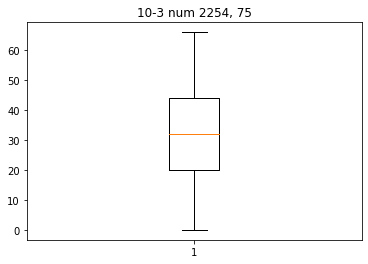

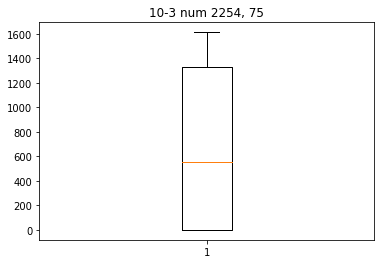

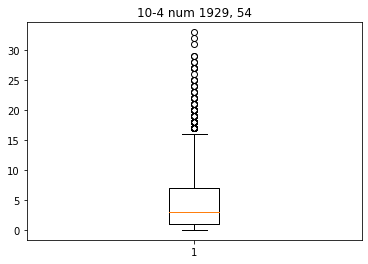

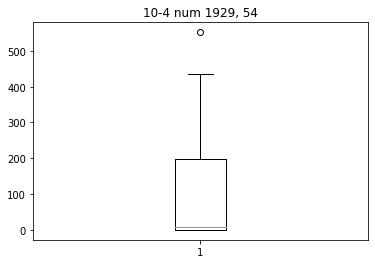

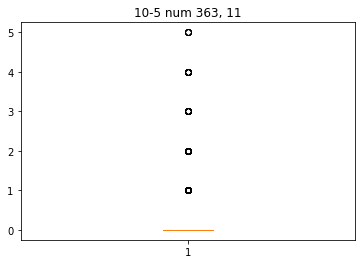

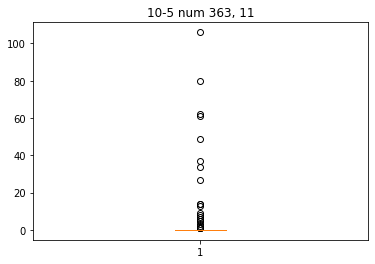

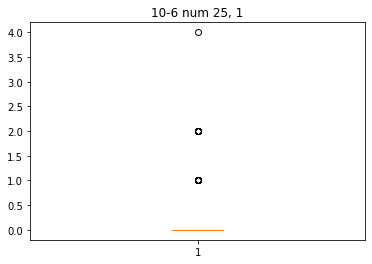

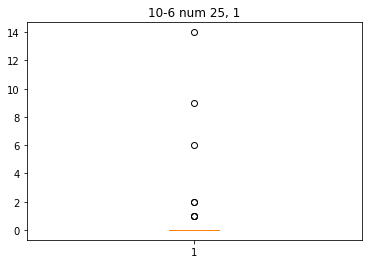

In [30]:
for i in range(3, 7):
    train_x = np.load("data/RBP-PWM/train/train_-log10__10-%s__x.npy" % i)
    plt.boxplot(np.sum(train_x != 0, axis=1))
    plt.title("10-%s num %s, %s" % (i, sum(np.sum(train_x != 0, axis=1) != 0), sum(np.sum(train_x != 0, axis=0) >= 10)))
    plt.show()
    plt.boxplot(np.sum(train_x != 0, axis=0))
    plt.title("10-%s num %s, %s" % (i, sum(np.sum(train_x != 0, axis=1) != 0), sum(np.sum(train_x != 0, axis=0) >= 10)))
    plt.show()
    # test_x = np.load("data/RBP-PWM/test/test__10-%s__x.npy" % i)
    # np.save("data/RBP-PWM/train/train_-log10__10-%s__x.npy" % i, np.where(train_x == 0, 0, -np.log10(train_x)))
    # np.save("data/RBP-PWM/test/test_-log10__10-%s__x.npy" % i, np.where(test_x == 0, 0, -np.log10(test_x)))

In [31]:
for i in range(3, 7):
    train_x = np.load("data/RBP-PWM/train/train__10-%s__x.npy" % i)
    train_x = np.where(train_x != 0, 1, 0)
    np.save("data/RBP-PWM/train/train_binary__10-%s__x.npy" % i, train_x)

In [32]:
train_y = np.load("data/RBP-PWM/train/train_y.npy")
for i in range(3, 5):
    train_x = np.load("data/RBP-PWM/train/train_-log10__10-%s__x.npy" % i)
    
    
    row_filter = np.sum(train_x != 0, axis=1) != 0
    col_filter = np.sum(train_x != 0, axis=0) >= 10
    print(train_y[row_filter].shape)
    print(train_x[row_filter][:, col_filter].shape)
    np.save("data/RBP-PWM/train/train_-log10__10-%s__filter__y.npy" % i, train_y[row_filter])
    np.save("data/RBP-PWM/train/train_-log10__10-%s__filter__x.npy" % i, train_x[row_filter][:, col_filter])
    np.save("data/RBP-PWM/train/train_-log10__10-%s__row_filter!=0.npy" % i, row_filter)
    np.save("data/RBP-PWM/train/train_-log10__10-%s__col_filter>=10.npy" % i, col_filter)
    
    train_x = np.load("data/RBP-PWM/train/train_binary__10-%s__x.npy" % i)
    row_filter = np.sum(train_x != 0, axis=1) != 0
    col_filter = np.sum(train_x != 0, axis=0) >= 10
    print(train_y[row_filter].shape)
    print(train_x[row_filter][:, col_filter].shape)
    np.save("data/RBP-PWM/train/train_binary__10-%s__filter__y.npy" % i, train_y[row_filter])
    np.save("data/RBP-PWM/train/train_binary__10-%s__filter__x.npy" % i, train_x[row_filter][:, col_filter])
    np.save("data/RBP-PWM/train/train_binary__10-%s__row_filter!=0.npy" % i, row_filter)
    np.save("data/RBP-PWM/train/train_binary__10-%s__col_filter>=10.npy" % i, col_filter)
    # print(i, sum(row_filter), sum(col_filter))
    # break
    

(2254,)
(2254, 75)
(2254,)
(2254, 75)
(1929,)
(1929, 54)
(1929,)
(1929, 54)


In [33]:
with open("data/Chiu/benchmark_cyto.out") as f:
    txt = f.read().split(">")[1:]
    arrays = []
    for i in range(len(txt)):
        # txt[i] = txt[i].split("\n")
        arrays.append([txt[i].split("\n")[0], txt[i].split("\n")[1]])
        # cdhit80_0320_hasloc[i][0] = cdhit80_0320_hasloc[i][0].split("|")[1]
print(arrays[0])


['AC002467.1|ENST00000440971|lncRNA|known|651|chr7:107742962-107744581[-]|0.215704|ENCODE,Cyto', 'ATTCTCGCCCGTCCACTCCCAGCGTAAAGAGGATTCCGCGACTCGGAGACCGCAATCTACCCGCCAGTCTCCATAACGTAGGCCAGAGCAGCTGGGCTAAATAAAACAGAGCCGGGGCTCTCCCTTCCCGAAGGCCTACATCGCCCACTGGTCCGGGCTCGGAGCTCAGCAGAACCAGAGTAGGAGCGGTTGTTGCCGGCACGGAGGAGGGAGAGCGCTTGTGACGCTACGAACCTCTCGAACACCTGACGACTGGGCGCCAGGGCCGGATGGAGGGTGGAGAGCCAGTGCGGCGCAGCTGCCTCCTCTTAACGGGGACACCTTGCAGGAATGTGCGGAGTGGAGCTAACGGGAGCGGATAGAAACCGAGGGAGGGGAAGAGAGCGCGAAGGCTTGGCCGGAAGGAGAGGTTAAAAAGGAAAGGCCTAAAATGAGGAAGAGAGTTACCACAACAAGCAGTACCTAGTTCCAGTTCTTGGTCCCAGGAGTTTGTGGTTGTTGCTGCTTTCATCTTCCTCAGCCAACACAAAAGGAAAGTGCCAAGGGGCGATTCCTAGGACCTTCAGTGCAGTCTCCACCTTGCGGACTTGGCTCATTTGTGTCCACTCCTTTCTCCAGCCTTTTACACTTGATGCTCTTGGATGAATAGAA']


In [34]:
seq_df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75.csv")

total: 3040
min: 50, max: 37027
<7500: 3010
<500: 250


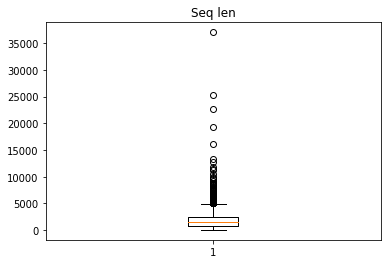

In [35]:
import matplotlib.pyplot as plt

l = [len(s) for s in seq_df['Sequence']]
print("total:", len(l))
print("min: %d, max: %d" % (min(l), max(l)))
print("<7500:", sum(np.array(l) < 7500))
print("<500:", sum(np.array(l) < 500))


plt.boxplot(l)
plt.title("Seq len")
plt.show()

In [36]:
data_y = np.where(seq_df["loc"].to_numpy() == "Cytosolic", 1, 0)
np.save("data/data_y_train.npy", data_y)

In [37]:
seq_df.head(10)

,Unnamed: 0,Refseq_ID,Gene_ID,Sequence,loc
0,8,NM_002457.4,NCBI:4583,CAACCCACACCGCCCCTGCCAGCCACCATGGGGCTGCCACTAGCCC...,Cytosolic
1,10,NR_109833.1,NCBI:101867536,AAATCTCAGCCTCCCACTCCCATATTTACAGTTTGATTAGGGAGGC...,Cytosolic
2,11,NR_026832.1,NCBI:150622,AGTCTGGCTGGAGCTGGACCGGCTGGTGGCGCCAGGCAGTGCCAAG...,Cytosolic
3,12,NR_073405.1,NCBI:441733,AGCACGCTGGCGGCTACCAAGCTGGAGGAGGCGGCGGGCGCGAGAC...,Cytosolic
4,13,NR_027418.1,NCBI:100499466,CTCGCCCCCCCGGAGCCGACAAATGGCCGCGGCGGCCTCAGGTCCG...,Cytosolic
5,14,NR_103556.2,NCBI:100288805,GGCACAAGACAACCTGACATTTCAGGAGATGCTCTGTCAGAATTGG...,Cytosolic
6,16,NR_148920.1,NCBI:191585,CGTAGCTCATAATCCATTTTTATAACACCTTGCTATCTATATTTAC...,Cytosolic
7,17,NR_002813.1,NCBI:359822,CTATGAGTCTGGCAGGAAGCTGAACAGTTTTACAAATTAGGCAATC...,Cytosolic
8,19,NR_026800.2,NCBI:9834,AGGGTTGTCTGGATGGGCAGGAAGAGCAGCGGGGGAGAAAGGGCTG...,Cytosolic
9,22,NR_027898.1,NCBI:646300,CAGGGAGAACGAGGCCCCTGAGGTCTTCCTGGACTCCGAGGTGAGG...,Cytosolic


In [38]:
# seq to fasta
print(seq_df.head(1))
with open("data/society/cdhit80_data_seq_loc75_test.fasta", 'w') as out:
    for i in range(len(seq_df)):
        out.write('>' + str(i) + "|" + seq_df['Gene_ID'][i] + '|' + seq_df['Refseq_ID'][i] + '\n' + seq_df['Sequence'][i] + '\n')

   Unnamed: 0    Refseq_ID    Gene_ID  \
0           8  NM_002457.4  NCBI:4583   

                                            Sequence        loc  
0  CAACCCACACCGCCCCTGCCAGCCACCATGGGGCTGCCACTAGCCC...  Cytosolic  


In [39]:
seq_df = pd.read_csv("data/society/All RNA sequence/human_RNA_sequence.txt", sep="\t")
rna_df = pd.read_csv("data/society/All RNA subcellular localization data.txt", sep="\t")
e_rna_df = pd.read_csv("data/society/All experimental RNA subcellular localization data.txt", sep="\t")

/home/jand/.conda/envs/jand_venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
# seq to fasta
print(seq_df.head(1))
with open("data/society/human_RNA_sequence.fasta", 'w') as out:
    for i in range(len(seq_df)):
        out.write('>' + seq_df['Gene_ID'][i] + '|' + seq_df['Refseq_ID'][i] + '\n' + seq_df['Sequence'][i] + '\n')

     Gene_ID       Refseq_ID  \
0  NCBI:1305  NM_001368885.1   

                                            Sequence  
0  ATCCGATCCGTGCCGCCGCAGGGAGTGTGTCAAGTTACAGAGGCGC...  


In [41]:
sub_df = rna_df[rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA', 'processed_transcript'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_value_counts = sub_df.value_counts('SubCellular_Localization').reset_index()
sub_has_seq_df = sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'].unique())]
sub_value_counts[1] = sub_has_seq_df.value_counts('SubCellular_Localization').reset_index()[0]
sub_value_counts = sub_value_counts.rename(columns={0: 'ALL', 1: 'Has Seq'})
print(sub_value_counts)

            SubCellular_Localization   ALL  Has Seq
0                            Exosome  6412   3344.0
1                            Nucleus   865    751.0
2                        Nucleoplasm   437    416.0
3                          Chromatin   416    397.0
4                          Nucleolus   295    283.0
5                            Cytosol   289    278.0
6                          Cytoplasm   231    149.0
7                           Membrane   135    134.0
8                Insoluble cytoplasm    47     45.0
9                           Ribosome    40     13.0
10             Ribosome-free cytosol    17      6.0
11                           Nuclear     7      5.0
12                     Mitochondrion     5      5.0
13                   Nuclear speckle     5      4.0
14                       Paraspeckle     4      2.0
15       Paraspeckles in the nucleus     2      1.0
16             Endoplasmic reticulum     2      1.0
17                  Nuclear membrane     1      1.0
18          

In [42]:
sub_df = rna_df[rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA', 'processed_transcript'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_df = sub_df.dropna(subset=['Gene_ID'])
sub_df.value_counts('SubCellular_Localization')
# sub_df.head(10)

SubCellular_Localization
Exosome                        6400
Nucleus                         807
Nucleoplasm                     436
Chromatin                       414
Nucleolus                       292
Cytosol                         285
Cytoplasm                       182
Membrane                        135
Insoluble cytoplasm              47
Ribosome                         14
Nuclear                           7
Ribosome-free cytosol             5
Nuclear speckle                   5
Paraspeckle                       4
Paraspeckles in the nucleus       2
Endoplasmic reticulum             2
Speckle periphery                 1
Microsome                         1
Mitochondrion                     1
Nuclear membrane                  1
Soma                              1
Perinuclear                       1
Periphery of the nucleus          1
Nuclear periphery                 1
dtype: int64

In [43]:
sub_df = e_rna_df[e_rna_df['RNA_category'].isin(['antisense RNA', 'lncRNA', 'lincRNA'])]
sub_df = sub_df[sub_df['Species'] == 'Homo sapiens']
sub_value_counts = sub_df.value_counts('SubCellular_Localization').reset_index()
sub_df = sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'].unique())]
sub_value_counts[1] = sub_df.value_counts('SubCellular_Localization').reset_index()[0]
sub_value_counts = sub_value_counts.rename(columns={0: 'ALL', 1: 'Has Seq'})
print(sub_value_counts)

            SubCellular_Localization  ALL  Has Seq
0                            Nucleus  306    212.0
1                          Cytoplasm  231    149.0
2                            Exosome   35     16.0
3                           Ribosome   34     16.0
4                            Cytosol   22     13.0
5              Ribosome-free cytosol   16      6.0
6                            Nuclear    7      5.0
7                          Chromatin    5      5.0
8                      Mitochondrion    5      4.0
9                    Nuclear speckle    5      3.0
10                       Paraspeckle    4      3.0
11                       Nucleoplasm    4      2.0
12                         Nucleolus    4      1.0
13       Paraspeckles in the nucleus    2      1.0
14             Endoplasmic reticulum    2      1.0
15                         Microsome    1      1.0
16                 Speckle periphery    1      1.0
17                  Nuclear membrane    1      1.0
18                 Nuclear peri

## Seq

### Col

['Gene_ID', 'Refseq_ID', 'Sequence']

## ALL RNA

### Col

['RNALocate_ID', 'Gene_ID', 'Gene_Name', 'Gene_symbol', 'RNA_category', 'Species', 'PMID', 'SubCellular_Localization', 'Description']

### 'RNA_category' in 'antisense RNA', 'lncRNA', 'lincRNA' and 'Species' == 'Homo sapiens'

`count()`
```txt
9210
```

`SubCellular_Localization unique()`
```txt
['Cytoplasm', 'Nucleus', 'Ribosome-free cytosol', 'Cytosol',
'Ribosome', 'Chromatin', 'Nucleoplasm', 'Nuclear',
'Nuclear periphery', 'Nucleolus', 'Paraspeckles in the nucleus',
'Endoplasmic reticulum', 'Periphery of the nucleus', 'Paraspeckle',
'Mitochondrion', 'Nuclear speckle', 'Microsome', 'Perinuclear',
'Nuclear membrane', 'Nuclear(exclusion from nucleoli)', 'Exosome',
'Soma', 'Speckle periphery', 'Insoluble cytoplasm', 'Membrane']
```

`SubCellular_Localization value_counts()`
```txt
Exosome                             6412
Nucleus                              865
Nucleoplasm                          437
Chromatin                            416
Nucleolus                            295
Cytosol                              289
Cytoplasm                            231
Membrane                             135
Insoluble cytoplasm                   47
Ribosome                              34
Ribosome-free cytosol                 16
Nuclear                                7
Mitochondrion                          5
Nuclear speckle                        5
Paraspeckle                            4
Paraspeckles in the nucleus            2
Endoplasmic reticulum                  2
Nuclear periphery                      1
Speckle periphery                      1
Soma                                   1
Microsome                              1
Nuclear(exclusion from nucleoli)       1
Nuclear membrane                       1
Perinuclear                            1
Periphery of the nucleus               1
Name: SubCellular_Localization, dtype: int64
```

`'Gene_ID', 'SubCellular_Localization' value_counts()value_counts()`
```
1     8728
2       76
3       15
4        8
5        6
21       1
11       1
10       1
9        1
7        1
dtype: int64
```

# problem

- All RNA subcellular localization data.txt / SubCellular_Localization 對應類別
```txt
Exosome                             6412    
Nucleus                              865    Nucleus
Nucleoplasm                          437    Nucleus
Chromatin                            416    Nucleus
Nucleolus                            295    Nucleus
Cytosol                              289    Cytosolic
Cytoplasm                            231    Cytosolic
Membrane                             135    Cytosolic
Insoluble cytoplasm                   47    Cytosolic
Ribosome                              34    Cytosolic
Ribosome-free cytosol                 16    Cytosolic
Nuclear                                7    Nucleus
Mitochondrion                          5    Cytosolic
Nuclear speckle                        5    Nucleus
Paraspeckle                            4    Nucleus
Paraspeckles in the nucleus            2    Nucleus
Endoplasmic reticulum                  2    Cytosolic
Nuclear periphery                      1    Nucleus
Speckle periphery                      1    Nucleus
Soma                                   1
Microsome                              1    Cytosolic
Nuclear(exclusion from nucleoli)       1    Nucleus
Nuclear membrane                       1    Nucleus
Perinuclear                            1    Nucleus
Periphery of the nucleus               1    Nucleus
Name: SubCellular_Localization, dtype: int64
```

照上面的規則取代後 count
```txt
Cytosolic    7172
Nucleus      2037
Soma            1
```

Gene_ID 的 SubCellular_Localization 數量
```txt
1    5675
2     881
3       1
```

- All RNA subcellular localization data.txt 與 human_RNA_sequence.txt 對應

In [44]:
# Cytosol,Cytoplasm,Ribosome,Exosome
# Nuclear,Nucleus
cytosolic = ['Cytosol', 'Cytoplasm', 'Membrane', 'Insoluble cytoplasm', 'Ribosome', 'Ribosome-free cytosol', 'Mitochondrion', 'Endoplasmic reticulum', 'Microsome']
nucleus = ['Nucleus', 'Nucleoplasm', 'Chromatin', 'Nucleolus', 'Nuclear', 'Nuclear speckle', 'Paraspeckle', 'Paraspeckles in the nucleus', 'Nuclear periphery', 'Speckle periphery', 'Nuclear(exclusion from nucleoli)', 'Nuclear membrane', 'Perinuclear', 'Periphery of the nucleus']

sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(cytosolic, 'Cytosolic')
sub_df['SubCellular_Localization'] = sub_df['SubCellular_Localization'].replace(nucleus, 'Nucleus')
sub_df = sub_df[sub_df['SubCellular_Localization'].isin(["Nucleus", "Cytosolic"])]
print(sub_df['SubCellular_Localization'].value_counts())

sub_has_seq_df['SubCellular_Localization'] = sub_has_seq_df['SubCellular_Localization'].replace(cytosolic, 'Cytosolic')
sub_has_seq_df['SubCellular_Localization'] = sub_has_seq_df['SubCellular_Localization'].replace(nucleus, 'Nucleus')
print(sub_has_seq_df['SubCellular_Localization'].value_counts())

Nucleus      239
Cytosolic    187
Name: SubCellular_Localization, dtype: int64
Exosome      3344
Nucleus      1867
Cytosolic     628
Soma            1
Name: SubCellular_Localization, dtype: int64


In [45]:
# print(sub_df.drop_duplicates(['Gene_ID', 'SubCellular_Localization'])['Gene_ID'].value_counts().value_counts())
# print(sub_has_seq_df.drop_duplicates(['Gene_ID', 'SubCellular_Localization'])['Gene_ID'].value_counts().value_counts())
# sub_df = sub_df.astype({'Gene_ID': str})
value_count = sub_df[['Gene_ID', 'SubCellular_Localization']].value_counts()
print(value_count)
print(value_count.value_counts())


Gene_ID         SubCellular_Localization
NCBI:378938     Nucleus                     32
NCBI:283131     Nucleus                     14
NCBI:7503       Nucleus                     10
NCBI:100124700  Nucleus                      9
NCBI:100048912  Nucleus                      7
                                            ..
NCBI:25845      Nucleus                      1
NCBI:257000     Cytosolic                    1
NCBI:254128     Cytosolic                    1
NCBI:253962     Nucleus                      1
NCBI:196475     Nucleus                      1
Length: 274, dtype: int64
1     213
2      37
3      12
4       4
5       3
32      1
14      1
10      1
9       1
7       1
dtype: int64


In [46]:
# print(sub_df[sub_df['Gene_ID'] == np.nan])
# sub_df = sub_df.dropna(subset=['Gene_ID'])
# print(sub_df['Gene_ID'].isnull().values.any())
# sub_df[sub_df['Gene_ID'] == 'nan']
# print(len(sub_df['Gene_ID'].unique()))
print('nan' in np.array(sub_df['Gene_ID'].unique(), dtype=str))
# print(np.sort(np.array(sub_df['Gene_ID'].unique(), dtype=str)))

False


In [47]:
value_count_df = value_count.reset_index()
local = []
for gene_id in sub_df['Gene_ID'].unique():
    nuc_count = value_count[gene_id]['Nucleus'] if 'Nucleus' in value_count[gene_id].index else 0
    cyt_count = value_count[gene_id]['Cytosolic'] if 'Cytosolic' in value_count[gene_id].index else 0
    local.append([gene_id, nuc_count, cyt_count])
local_df = pd.DataFrame(local, columns=['Gene_ID', 'Nucleus', 'Cytosolic'])
local_df.head(10)

,Gene_ID,Nucleus,Cytosolic
0,NCBI:100048912,7,4
1,NCBI:100124700,9,3
2,NCBI:100128098,0,1
3,NCBI:100128191,0,3
4,NCBI:100129387,1,0
5,NCBI:100129550,1,1
6,NCBI:100129617,0,1
7,NCBI:100130581,0,1
8,NCBI:100130967,0,1
9,NCBI:100287314,0,1


In [48]:
local_df.to_csv("data/society/Gene_ID_Nucleus_Cytosolic_0315.csv", index=False)

In [49]:
nuc_sum = 0
cyt_sum = 0
for i in range(len(local_df)):
    if local_df["Nucleus"][i] / (local_df["Nucleus"][i] + local_df["Cytosolic"][i]) > 0.75:
        nuc_sum += 1
    if local_df["Cytosolic"][i] / (local_df["Nucleus"][i] + local_df["Cytosolic"][i]) > 0.75:
        cyt_sum += 1
print("nuc_sum= %d, cyt_sum= %d" % (nuc_sum, cyt_sum))

nuc_sum= 66, cyt_sum= 81


In [50]:
print(sub_df.count())
print(sub_df[sub_df['Gene_ID'].isin(seq_df['Gene_ID'])].count())
sub_has_seq_df = sub_df[sub['Gene_ID'].isin(seq_df['Gene_ID'])]

RNALocate_ID                426
Gene_ID                     426
Gene_Name                   426
Gene_symbol                 426
RNA_category                426
Species                     426
PMID                        426
SubCellular_Localization    426
Description                 426
dtype: int64
RNALocate_ID                426
Gene_ID                     426
Gene_Name                   426
Gene_symbol                 426
RNA_category                426
Species                     426
PMID                        426
SubCellular_Localization    426
Description                 426
dtype: int64


NameError: name 'sub' is not defined

In [ ]:
import re
with open("data/society/human_RNA_sequence_cdhit80.clstr") as f:
    arrays = f.read().split(">Cluster")
    cluster_array = []
    for cluster in arrays[1:]:
        cluster_dict = dict()
        cluster_dict["other"] = []
        for row in cluster.split("\n")[1:-1]:
            if "*" in row:
                cluster_dict["main"] = row[row.index("|")+1:row.index("...")]
            cluster_dict["other"].append(row[row.index(">")+1:row.index("|")])
        cluster_array.append(cluster_dict)

In [ ]:
cluster_array

[{'other': ['NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273',
   'NCBI:7273'],
  'main': 'NM_001267'},
 {'other': ['NCBI:201853', 'NCBI:10984'], 'main': 'NR_00272'},
 {'other': ['NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025',
   'NCBI:94025'],
  'main': 'NM_02469'},
 {'other': ['NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:399979',
   'NCBI:39

In [ ]:
import csv

# print(len(cluster_array))
with open("data/gencode/v38_lncRNA_transcripts") as f:
    array = f.read().split(">")
    cdhit80_array = []
    for row in array[1:]:
        row_array = row.replace("\n", "").split("|")
        # row_array.append(row_array[1].split(".")[0])
        cdhit80_array.append(row_array)
    # cdhit80_array = cdhit80_array[1:]
cdhit80_df = pd.DataFrame(cdhit80_array)
print(len(cdhit80_df))
print(cdhit80_df.head(10))


30863
                   0                   1                      2  \
0  ENST00000417324.1   ENSG00000237613.2   OTTHUMG00000000960.1   
1  ENST00000466430.5   ENSG00000238009.6   OTTHUMG00000001096.2   
2  ENST00000471248.1   ENSG00000238009.6   OTTHUMG00000001096.2   
3  ENST00000484859.1   ENSG00000241860.7   OTTHUMG00000002480.4   
4  ENST00000662089.1   ENSG00000241860.7   OTTHUMG00000002480.4   
5  ENST00000491962.1   ENSG00000241860.7   OTTHUMG00000002480.4   
6  ENST00000655252.1   ENSG00000241860.7   OTTHUMG00000002480.4   
7  ENST00000496488.1   ENSG00000241599.1   OTTHUMG00000002525.1   
8  ENST00000669836.1   ENSG00000286448.1   OTTHUMG00000194680.1   
9  ENST00000670700.1  ENSG00000237491.10  OTTHUMG00000002404.21   

                      3                  4              5     6  \
0  OTTHUMT00000002842.1        FAM138A-201        FAM138A  1187   
1  OTTHUMT00000003225.1   RP11-34P13.7-001   RP11-34P13.7  2748   
2  OTTHUMT00000003687.1   RP11-34P13.7-002   RP11-34P13

In [ ]:
df = pd.DataFrame(cdhit80_df)

In [ ]:
sub_seq_df = seq_df[seq_df['Gene_ID'].isin(sub_df['Gene_ID'])]
print(sub_seq_df.count())
sub_loc_df = sub_df[sub_df['Gene_ID'].isin(sub_seq_df['Gene_ID']) & (sub_df["SubCellular_Localization"].isin(["Cytosolic", "Nucleus"]))]
sub_loc_df = sub_loc_df[["Gene_ID", "SubCellular_Localization"]]
print(sub_loc_df.count())
merge_df = pd.merge(sub_seq_df, sub_loc_df, on=["Gene_ID"], how="inner")
print(merge_df.count())

for cluster_dict in cluster_array:
    merge_df.loc[merge_df["Refseq_ID"].isin(cluster_dict["other"]), ["Refseq_ID"]] = cluster_dict["main"]
# print(merge_df.head(5))
# print(len(merge_df["Refseq_ID"].unique()))

Gene_ID      5660
Refseq_ID    5660
Sequence     5660
dtype: int64
Gene_ID                     5839
SubCellular_Localization    5839
dtype: int64
Gene_ID                     11674
Refseq_ID                   11674
Sequence                    11674
SubCellular_Localization    11674
dtype: int64


In [ ]:
print(len(merge_df["Refseq_ID"].unique()))
print(len(cdhit80_df))

3980
3980


In [ ]:
col_array = ["Refseq_ID", "Cytosolic", "Nucleus"]
data = pd.DataFrame([], columns=col_array)
for cluster_dict in cluster_array:
    row = {"Refseq_ID": cluster_dict['main'],
            "Cytosolic": len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"]) & (sub_loc_df["SubCellular_Localization"] == "Cytosolic")]) / len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"])]),
            "Nucleus": len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"]) & (sub_loc_df["SubCellular_Localization"] == "Nucleus")]) / len(sub_loc_df[sub_loc_df["Gene_ID"].isin(cluster_dict["other"])])}
    
    data = data.append(row, ignore_index=True)
print(data.head(5))

     Refseq_ID  Cytosolic   Nucleus
0  NR_002728.3   0.300000  0.700000
1  NR_003255.2   0.250000  0.750000
2  NM_173600.2   0.200000  0.800000
3  NR_170290.1   0.333333  0.666667
4  NR_131012.1   0.181818  0.818182


In [ ]:
print(data.count())
print(len(data['Refseq_ID'].unique()))


Refseq_ID    3980
Cytosolic    3980
Nucleus      3980
dtype: int64
3980


In [ ]:
for rid in merge_df["Refseq_ID"].unique():
    for loc in merge_df["SubCellular_Localization"].unique():
        merge_df.loc[(merge_df["Refseq_ID"] == rid) & (merge_df["SubCellular_Localization"] == loc), ["W"]] = len(merge_df[(merge_df["Refseq_ID"] == rid) & (merge_df["SubCellular_Localization"] == loc)]) / len(merge_df[merge_df["Refseq_ID"] == rid])
print(merge_df.head(5))

          Gene_ID    Refseq_ID  \
0     NCBI:285758  NR_038863.2   
1  NCBI:100128640  NR_028389.1   
2  NCBI:101929484  NR_132623.1   
3  NCBI:101929484  NR_132622.1   
4  NCBI:100874363  NR_047504.1   

                                            Sequence SubCellular_Localization  \
0  AGCTGCCGAGTGAGAAGTCTGACTATCCGGAGATGGCGGTGAGTAT...                Cytosolic   
1  GCTACACTTAGTGACTCTGAGGGACATGCAACCCTCCCCGCATGCT...                Cytosolic   
2  TCCGGGCGGAGAACAACAAGGTCTATTGGTCTATGTAATGCTGGTG...                Cytosolic   
3  CCTGGCCGTGGGGTCAGCTGCACAGGCCAGGAGCTCGAGGGTGGTG...                Cytosolic   
4  GGCTTTTTTTTCCTTGCCTTCTTTTCCCCCTCTCCCACCCCCTTCT...                Cytosolic   

          W  
0  1.000000  
1  1.000000  
2  1.000000  
3  1.000000  
4  0.666667  


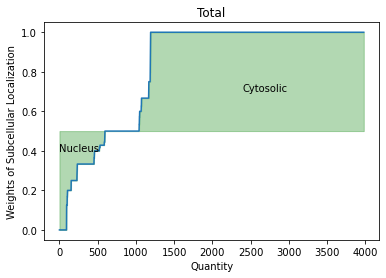

In [ ]:
import matplotlib.pyplot as plt

w = data.sort_values(by=["Cytosolic"])["Cytosolic"]
w_idx = np.arange(len(w))

plt.plot(w_idx, w)
# plt.plot(w, w_idx)
plt.fill_between(w_idx, w, 0.5, color = 'g', alpha=0.3)
# plt.fill_between(w_idx, w, 0.5, color = 'r', alpha=0.3)
plt.text(len(w) * 0.6, .7, "Cytosolic")
plt.text(0, .4, "Nucleus")
plt.title("Total")
plt.xlabel("Quantity")
plt.ylabel("Weights of Subcellular Localization")
plt.show()

In [ ]:
print(data["Cytosolic"].value_counts())
print(data["Nucleus"].value_counts())

# w = data[data["SubCellular_Localization"] == "Cytosolic"].sort_values(by=["W"])["W"]
# index = np.arange(len(w))
# plt.plot(index, w)
# plt.xlabel("Quantity")
# plt.ylabel("Weights of Subcellular Localization")
# plt.show()

1.000000    2790
0.500000     448
0.333333     219
0.666667      95
0.000000      93
0.250000      76
0.400000      65
0.428571      56
0.200000      48
0.600000      21
0.750000      18
0.416667       8
0.125000       8
0.444444       6
0.363636       4
0.625000       3
0.166667       3
0.533333       3
0.571429       3
0.800000       2
0.285714       2
0.714286       2
0.181818       1
0.888889       1
0.461538       1
0.307692       1
0.476190       1
0.375000       1
0.300000       1
Name: Cytosolic, dtype: int64
0.000000    2790
0.500000     448
0.666667     219
0.333333      95
1.000000      93
0.750000      76
0.600000      65
0.571429      56
0.800000      48
0.400000      21
0.250000      18
0.583333       8
0.875000       8
0.555556       6
0.636364       4
0.833333       3
0.466667       3
0.428571       3
0.375000       3
0.285714       2
0.200000       2
0.714286       2
0.523810       1
0.692308       1
0.625000       1
0.538462       1
0.700000       1
0.818182       1
0

In [ ]:
print("ALL")
print(data["SubCellular_Localization"].value_counts())

for i in range(5, 10):
    print(i/10)
    print(data[data["W"] > i/10]["SubCellular_Localization"].value_counts())

ALL
Cytosolic    3887
Nucleus      1190
Name: SubCellular_Localization, dtype: int64
0.5
Cytosolic    2938
Nucleus       594
Name: SubCellular_Localization, dtype: int64
0.6
Cytosolic    2911
Nucleus       457
Name: SubCellular_Localization, dtype: int64
0.7
Cytosolic    2813
Nucleus       231
Name: SubCellular_Localization, dtype: int64
0.8
Cytosolic    2791
Nucleus       105
Name: SubCellular_Localization, dtype: int64
0.9
Cytosolic    2790
Nucleus        93
Name: SubCellular_Localization, dtype: int64


In [ ]:
data.to_csv("data/society/cdhit80_data.csv", index=False)

In [ ]:
data_df = pd.read_csv("data/society/cdhit80_data.csv")


# df = seq_sub_df["Refseq_ID"].value_counts().reset_index()

# print(seq_sub_df.drop_duplicates()["Sequence"].value_counts())

# print(seq_sub_df[seq_sub_df["Refseq_ID"].isin(df[df["Refseq_ID"] > 1]["index"][0:1])])
# print(len(seq_df[seq_df["Refseq_ID"].isin(df[df["Refseq_ID"] > 1]["index"])]))
# print(len(seq_df['Refseq_ID']))
# print(len(seq_df['Refseq_ID'].unique()))
cdhit_df = cdhit80_df.rename(columns={0:"Gene_ID", 1:"Refseq_ID", 2:"Sequence"})
print(len(cdhit_df))
merge_df = pd.merge(data_df, cdhit_df, on=["Refseq_ID"], how="inner")
print(merge_df.head(1))
print(len(merge_df))
# print(len(data_df['Refseq_ID']))
# print(len(data_df['Refseq_ID'].unique()))
merge_df.to_csv("data/society/cdhit80_data_seq.csv")


3980
     Refseq_ID  Cytosolic  Nucleus     Gene_ID  \
0  NR_002728.3        0.3      0.7  NCBI:10984   

                                            Sequence  
0  AGGCAGAACGGTCGCCGCGTCGCCTCAGCACGGACCTCCAGGGAGC...  
3980


In [ ]:
df = pd.read_csv("data/linear_features/old/cdhit80_k1_linear10_norL.csv")

In [ ]:
df = pd.read_csv("data/society/cdhit80_data_seq.csv")

In [ ]:
df.head(1)

,Unnamed: 0,Refseq_ID,Cytosolic,Nucleus,Gene_ID,Sequence
0,0,NR_002728.3,0.3,0.7,NCBI:10984,AGGCAGAACGGTCGCCGCGTCGCCTCAGCACGGACCTCCAGGGAGC...


In [ ]:
len(df)

3980

In [ ]:
cyt = df[df["Cytosolic"] >= 0.75]
cyt["loc"] = "Cytosolic"
nuc = df[df["Nucleus"] >= 0.75]
nuc["loc"] = "Nucleus"
print(len(cyt))
print(len(nuc))
output = cyt.append(nuc)
output = output.drop(columns=["Cytosolic", "Nucleus"])
print(len(output))
print(output.head(1))


2811
229
3040
         0          1          2          3          4          5          6  \
8 -7.58671  12.403196  26.422672 -88.104345  96.099966 -51.728765  14.502938   

          7         8         9  ...          36        37        38  \
8 -2.431709  0.403059  0.041272  ... -103.913918  26.12355  6.326008   

         39       40      41        42        43    len        loc  
8 -4.428124  0.74653 -0.1738 -0.039532  0.140704  16050  Cytosolic  

[1 rows x 46 columns]


<ipython-input-5-eebaa4a36bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cyt["loc"] = "Cytosolic"
<ipython-input-5-eebaa4a36bcc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuc["loc"] = "Nucleus"


In [ ]:
output.to_csv("data/linear_features/old/cdhit80_k1_linear10_norL_loc75.csv", index=False)

Nuc
